In [22]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme(style="darkgrid")
sns.set_context("notebook")

In [8]:
PATH = Path("..", "data", "penguins.csv")

df = pd.read_csv(PATH)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [19]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [21]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


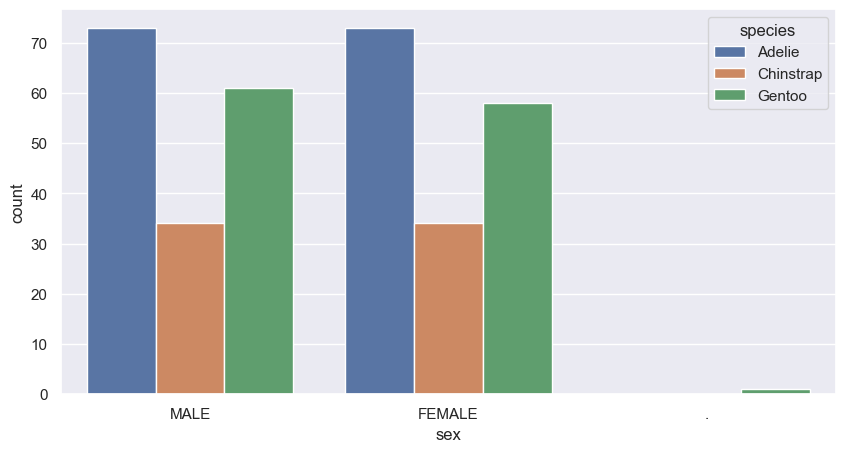

In [17]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
sns.countplot(data=df, x="sex", hue="species", ax=ax)
plt.show()

In [28]:
# Chi-square test of independence
expected, observed, stats = pg.chi2_independence(df, "species", "sex")
line_break = "-" * 30
print("Expected:")
print(line_break)
print(expected)
print(line_break)
print("Observed:")
print(line_break)
print(observed)
print(line_break)
print("Stats:")
print(line_break)
print(stats)

Contingency Table:
------------------------------
sex        .  FEMALE  MALE
species                   
Adelie     0      73    73
Chinstrap  0      34    34
Gentoo     1      58    61
------------------------------
Expected:
------------------------------
sex               .     FEMALE       MALE
species                                  
Adelie     0.437126  72.125749  73.437126
Chinstrap  0.203593  33.592814  34.203593
Gentoo     0.359281  59.281437  60.359281
------------------------------
Observed:
------------------------------
sex        .  FEMALE  MALE
species                   
Adelie     0      73    73
Chinstrap  0      34    34
Gentoo     1      58    61
------------------------------
Stats:
------------------------------
                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  1.837181  4.0  0.765673  0.051675  0.100523
1        cressie-read  0.666667  1.815522  4.0  0.769641  0.051370  0.099869
2      log-likelihood  0.0

/Users/agamemnonkrasoulis/miniconda3/envs/mlschool/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/Users/agamemnonkrasoulis/miniconda3/envs/mlschool/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/Users/agamemnonkrasoulis/miniconda3/envs/mlschool/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7663: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/Users/agamemnonkrasoulis/miniconda3/envs/mlschool/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7663: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/Users/agamemnonkrasoulis/miniconda3/envs/mlschool/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7660: RuntimeWarning: divide by zero encountered 